# Business Problem
From Retailers to Manufacturers to even small businesses , everybody uses discount coupons in their marketing strategies to not only boost sales but also increase Customer Retention rate. Even us buyers, it’s hard to think of an online purchase we made without any discount/offer.
A study showing that 90% of users use coupons for purchases actively. Therefore it becomes crucial for businesses to capitalize on this marketing strategy to meet their Revenue and Profit goals.
Here the data we have is specifically recommending coupons to users on their In-Vehicle mobile systems and we predict whether the customer will accept the coupon or not.

Predicting whether the user will accept the coupon or not is a hard problem and we cannot just recommend it to everyone because of the costs involved.
So some local businesses want us to build a system which will accurately predict whether the user will accept their discount coupon or not while keeping the marketing costs as low as possible.

# Data Set Information:

This data was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. For more information about the dataset, please refer to the paper:
Wang, Tong, Cynthia Rudin, Finale Doshi-Velez, Yimin Liu, Erica Klampfl, and Perry MacNeille. 'A bayesian framework for learning rule sets for interpretable classification.' The Journal of Machine Learning Research 18, no. 1 (2017): 2357-2393.


# Attribute Information:

destination: No Urgent Place, Home, Work

passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)

weather: Sunny, Rainy, Snowy

temperature:55, 80, 30

time: 2PM, 10AM, 6PM, 7AM, 10PM

coupon: Restaurant(<$20), Coffee House, Carry out & Take away, Bar, Restaurant($20-$50)

expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)

gender: Female, Male

age: 21, 46, 26, 31, 41, 50plus, 36, below21

maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
has_Children:1, 0

education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School

occupation: Unemployed, Architecture & Engineering, Student,
Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry

income: $37500 - $49999, $62500 - $74999, $12500 - $24999, $75000 - $87499,
$50000 - $62499, $25000 - $37499, $100000 or More, $87500 - $99999, Less than $12500

Bar: never, less1, 1~3, gt8, nan4~8 (feature meaning: how many times do you go to a bar every month?)

CoffeeHouse: never, less1, 4~8, 1~3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)

CarryAway:n4~8, 1~3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)

RestaurantLessThan20: 4~8, 1~3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?)

Restaurant20To50: 1~3, less1, never, gt8, 4~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $20 - $50 every month?)

toCoupon_GEQ15min:0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)

toCoupon_GEQ25min:0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)

direction_same:0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)

direction_opp:1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
Y:1, 0 (whether the coupon is accepted)

# import necessary libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# reading the data

In [122]:
df = pd.read_csv("in-vehicle-coupon-recommendation.csv")
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [123]:
df1 = df.copy()

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [125]:
df.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
df.shape

(12684, 26)

In [127]:
df.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
car                      5
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

### Since our data is very small, columns like Occupation can cause curse of dimensionality if one hot encoded.

# checking the skewness of each features

In [128]:
#Skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean
df.skew(skipna = True)

C:\Users\DELL\AppData\Local\Temp/ipykernel_13296/3882145881.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew(skipna = True)


temperature         -0.643390
has_children         0.348644
toCoupon_GEQ5min     0.000000
toCoupon_GEQ15min   -0.247890
toCoupon_GEQ25min    2.351805
direction_same       1.389366
direction_opp       -1.389366
Y                   -0.276364
dtype: float64

#### If skewness is less than −1 or greater than +1, the distribution can be called highly skewed.
#### If skewness is between −1 and −½ or between +½ and +1, the distribution can be called moderately skewed.
#### If skewness is between −½ and +½, the distribution can be called approximately symmetric.

## Missing Values

In [129]:
print('Percentage of Null Values:')
round(df.isnull().sum().sort_values(ascending = False)*100 / df.shape[0],2)

Percentage of Null Values:


car                     99.15
CoffeeHouse              1.71
Restaurant20To50         1.49
CarryAway                1.19
RestaurantLessThan20     1.02
Bar                      0.84
destination              0.00
passanger                0.00
direction_opp            0.00
direction_same           0.00
toCoupon_GEQ25min        0.00
toCoupon_GEQ15min        0.00
toCoupon_GEQ5min         0.00
income                   0.00
occupation               0.00
education                0.00
has_children             0.00
maritalStatus            0.00
age                      0.00
gender                   0.00
expiration               0.00
coupon                   0.00
time                     0.00
temperature              0.00
weather                  0.00
Y                        0.00
dtype: float64

#### Car Attribute Has 99 Percent of null values so we have to Drop it, While others have only 1% of missing values

<AxesSubplot:>

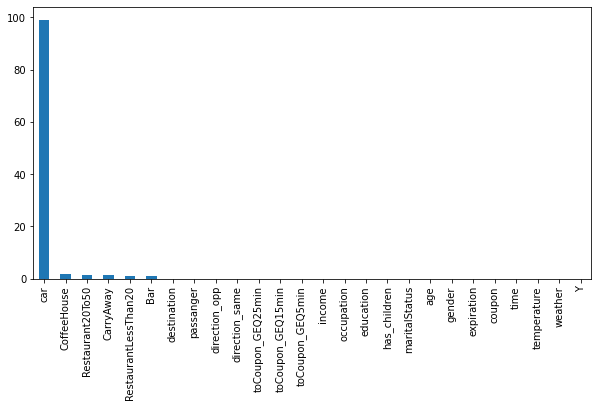

In [130]:
(df.isnull().sum().sort_values(ascending = False)*100 / df.shape[0]).plot(kind="bar",figsize=(10,5))

### distribution of y

Checking Number of People who has taken and not takent the coupon 
 1    7210
0    5474
Name: Y, dtype: int64


<AxesSubplot:>

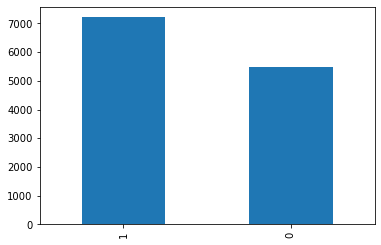

In [11]:
print('Checking Number of People who has taken and not takent the coupon \n',df["Y"].value_counts())
df["Y"].value_counts().plot(kind="bar")

Checking Percentage of People who has taken and not takent the coupon
1    57.0
0    43.0
Name: Y, dtype: float64 2


<AxesSubplot:ylabel='Y'>

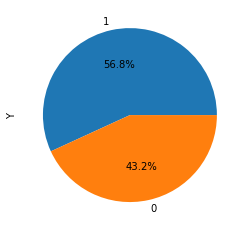

In [12]:
print('Checking Percentage of People who has taken and not takent the coupon')
print(round(df["Y"].value_counts()/len(df["Y"])*100),2)
df["Y"].value_counts().plot(kind="pie", autopct='%.1f%%')

### So, we have 56-44 ratio of two labels in target variable. so we dont have to suffer from data imbalance. 

### checking duplicated values

In [13]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12679    False
12680    False
12681    False
12682    False
12683    False
Length: 12684, dtype: bool

In [14]:
df[df.duplicated()]

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4192,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,never,1~3,less1,less1,1,1,1,0,1,1
4236,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,26,Single,...,gt8,gt8,4~8,less1,1,1,1,0,1,1
4280,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,26,Single,...,never,4~8,1~3,less1,1,1,1,0,1,1
4324,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,46,Single,...,never,4~8,1~3,1~3,1,1,1,0,1,1
4409,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,...,never,less1,1~3,never,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8511,Home,Alone,Sunny,80,6PM,Bar,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,0,0,1,0,1
8512,Home,Partner,Sunny,30,10PM,Carry out & Take away,2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,0,0,1,1
8513,Work,Alone,Rainy,55,7AM,Restaurant(<20),2h,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0
8515,Work,Alone,Snowy,30,7AM,Restaurant(20-50),1d,Male,46,Married partner,...,1~3,1~3,less1,1~3,1,1,1,0,1,0


In [15]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [16]:
X= df.iloc[:,:-1]

In [17]:
X.shape

(12684, 25)

In [18]:
y = df.iloc[:,-1]

In [19]:
y.shape

(12684,)

# checking the unique values of car column

In [20]:
df["car"].unique() # this Column has 99% Null Values 

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

### Data Wrangling by translating "raw" data into a more usable form

In [21]:
for col in df.columns:
    print(col, "has", df[col].nunique() , " unique values, those are:")
    print(df[col].unique())
    print()
        

destination has 3  unique values, those are:
['No Urgent Place' 'Home' 'Work']

passanger has 4  unique values, those are:
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']

weather has 3  unique values, those are:
['Sunny' 'Rainy' 'Snowy']

temperature has 3  unique values, those are:
[55 80 30]

time has 5  unique values, those are:
['2PM' '10AM' '6PM' '7AM' '10PM']

coupon has 5  unique values, those are:
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']

expiration has 2  unique values, those are:
['1d' '2h']

gender has 2  unique values, those are:
['Female' 'Male']

age has 8  unique values, those are:
['21' '46' '26' '31' '41' '50plus' '36' 'below21']

maritalStatus has 5  unique values, those are:
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']

has_children has 2  unique values, those are:
[1 0]

education has 6  unique values, those are:
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 

In [22]:
d_time = {
    '7AM':'Morning',
    '10AM':'Morning',
    '2PM':'Evening',
    '6PM':'Evening',
    '10PM':'Night'
}
d_temperature = {
    55:'Low',
    80:'High', 
    30:'Medium'
}
d_Bar = {
    'less1':'Atmost 1', 
    '1~3':'1 to 3',
    'gt8':'Greater than 8' , 
    '4~8':'4 to 8',
    'never':'never'
}
d_CoffeeHouse = {
    'less1':'Atmost 1', 
    '1~3':'1 to 3',
    'gt8':'Greater than 8' , 
    '4~8':'4 to 8',
    'never':'never'
}
d_CarryAway = {
    'less1':'Atmost 1', 
    '1~3':'1 to 3',
    'gt8':'Greater than 8' , 
    '4~8':'4 to 8',
    'never':'never'
}
d_RestaurantLessThan20 = {
    'less1':'Atmost 1', 
    '1~3':'1 to 3',
    'gt8':'Greater than 8' , 
    '4~8':'4 to 8',
    'never':'never'
}
d_Restaurant20To50 = {
    'less1':'Atmost 1', 
    '1~3':'1 to 3',
    'gt8':'Greater than 8' , 
    '4~8':'4 to 8',
    'never':'never'
}
d_expiration = {
    '1d':'24h',
    '2h':'2h'
}

In [132]:
col_to_be_changed = ["time","temperature","Bar","CoffeeHouse","CarryAway","RestaurantLessThan20","Restaurant20To50","expiration"]
changed_name = [d_time,d_temperature ,d_Bar,d_CoffeeHouse,d_CarryAway,d_RestaurantLessThan20,d_Restaurant20To50,d_expiration]

for column,change in zip(col_to_be_changed,changed_name):
    print(column)
    print(change)
    df[column] = df[column].replace(change)

time
{'7AM': 'Morning', '10AM': 'Morning', '2PM': 'Evening', '6PM': 'Evening', '10PM': 'Night'}
temperature
{55: 'Low', 80: 'High', 30: 'Medium'}
Bar
{'less1': 'Atmost 1', '1~3': '1 to 3', 'gt8': 'Greater than 8', '4~8': '4 to 8', 'never': 'never'}
CoffeeHouse
{'less1': 'Atmost 1', '1~3': '1 to 3', 'gt8': 'Greater than 8', '4~8': '4 to 8', 'never': 'never'}
CarryAway
{'less1': 'Atmost 1', '1~3': '1 to 3', 'gt8': 'Greater than 8', '4~8': '4 to 8', 'never': 'never'}
RestaurantLessThan20
{'less1': 'Atmost 1', '1~3': '1 to 3', 'gt8': 'Greater than 8', '4~8': '4 to 8', 'never': 'never'}
Restaurant20To50
{'less1': 'Atmost 1', '1~3': '1 to 3', 'gt8': 'Greater than 8', '4~8': '4 to 8', 'never': 'never'}
expiration
{'1d': '24h', '2h': '2h'}


In [24]:
df.head(30)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,Low,Evening,Restaurant(<20),24h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,High,Morning,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,High,Morning,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,24h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,High,Evening,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,Low,Evening,Carry out & Take away,24h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,High,Morning,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,High,Morning,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,High,Morning,Bar,24h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,0


### EDA

In [25]:
df["destination"].value_counts()

No Urgent Place    6283
Home               3237
Work               3164
Name: destination, dtype: int64

<AxesSubplot:xlabel='destination', ylabel='count'>

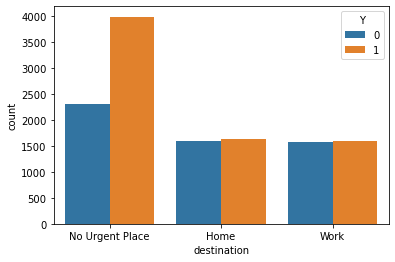

In [26]:
sns.countplot(data = df,x="destination",hue = "Y")

### if a person has no urgent place to go, its quite obvious he is more likely (almost 2 times) to accept the coupons. 

In [27]:
df["passanger"].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

<AxesSubplot:xlabel='passanger', ylabel='count'>

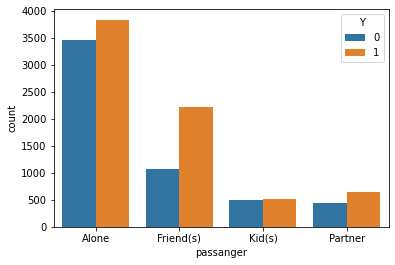

In [28]:
sns.countplot(data = df,x="passanger",hue = "Y")

### if a person has friends with him, he is more likely(more than two times) to accept the coupons.
### no of datapoints of people who are alone, so survey has done on max alone category people.For them, its almost equal proportions of coupon acceptance and not acceptance. 

In [29]:
df["weather"].value_counts()

Sunny    10069
Snowy     1405
Rainy     1210
Name: weather, dtype: int64

<AxesSubplot:xlabel='weather', ylabel='count'>

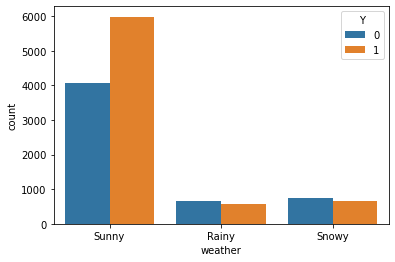

In [30]:
sns.countplot(data = df,x="weather",hue = "Y")

### if the weather is sunny, its more probable (almost 1.5 times ) to accept a coupon. 
### Also, the survey has been done mainly on sunny day, so its very much obvious that on sunny day people who are also driver are max probable to accept the coupon.

In [31]:
df["temperature"].value_counts()

High      6528
Low       3840
Medium    2316
Name: temperature, dtype: int64

<AxesSubplot:xlabel='temperature', ylabel='count'>

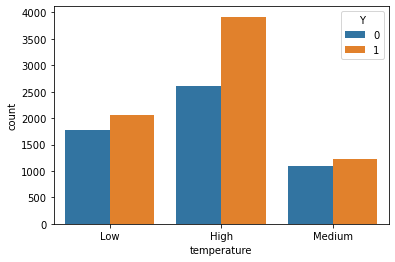

In [32]:
sns.countplot(data = df,x="temperature",hue = "Y")

### 1.in high temp zone, people are more likely(almost 1.5 times) to accept the coupon
### 2. max no of coupon acceptance in high temp zone.

In [33]:
df["time"].value_counts()

Morning    5439
Evening    5239
Night      2006
Name: time, dtype: int64

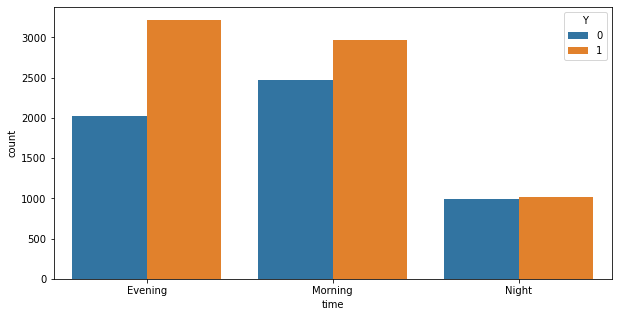

In [136]:
plt.figure(figsize=(10,5)) 
sns.countplot(data = df,x="time",hue = "Y")
plt.show()

### at 2 pm, people are more likely (almost double) two accept the coupons. thats obvious also, because they may use the coupons to have their lunch. 

### Also, at 10 am during start of the office time, people are more likely to use the coupon for their breakfast and also we can infer that during 6pm, after the work they are also more likely to go to bar / coffeehouse using coupons.  

In [35]:
df["coupon"].value_counts()

Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: coupon, dtype: int64

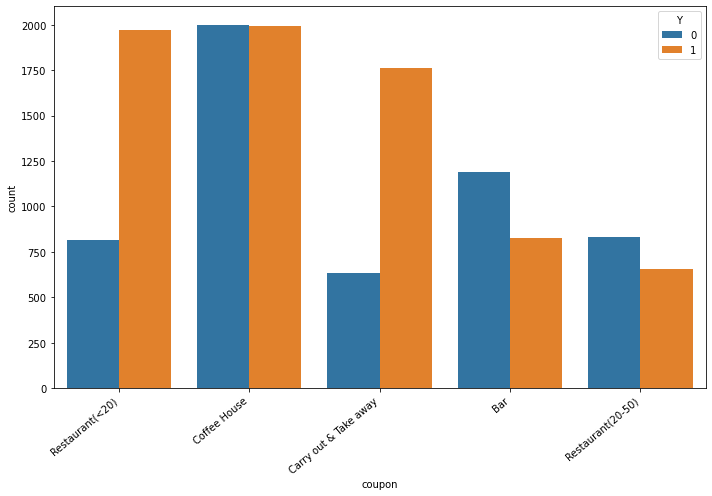

In [140]:
plt.figure(figsize=(10,7)) 
ax=sns.countplot(data = df,x="coupon",hue = "Y")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### acceptance of coupon for rest<20 is almost double where as for expensive (rest (20-50)) its more likely to not accept the coupons. 

### People are more likely to order their food and take away it instead of having food sitting at rest 

### for coffee-house its almost 50-50 chance to accept a coupon, 

### but for bar people are less likely to accept a coupon or they dont like bar coupons.

### Also, People are not vey fond of having coupons of expensive restaurants.no of not acceptances is higher than the no of acceptances.

In [37]:
df["expiration"].value_counts()

24h    7091
2h     5593
Name: expiration, dtype: int64

<AxesSubplot:xlabel='expiration', ylabel='count'>

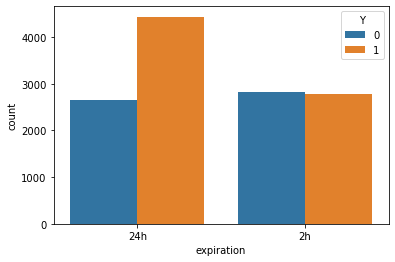

In [38]:
sns.countplot(data = df,x="expiration",hue = "Y")

### its quite obvious, the coupons having more expiration time, will be using more , so people are more likely to accept coupons which have much longer expiration rather than the shorter ones. 

In [39]:
df["gender"].value_counts()

Female    6511
Male      6173
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

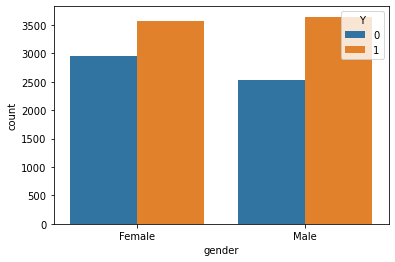

In [40]:
sns.countplot(data = df,x="gender",hue = "Y")

### Distribution of Gender is almost symmentric about male or female although coupons accepted by males are slightly higher than the females. 

In [41]:
df["age"].value_counts()

21         2653
26         2559
31         2039
50plus     1788
36         1319
41         1093
46          686
below21     547
Name: age, dtype: int64

<AxesSubplot:xlabel='age', ylabel='count'>

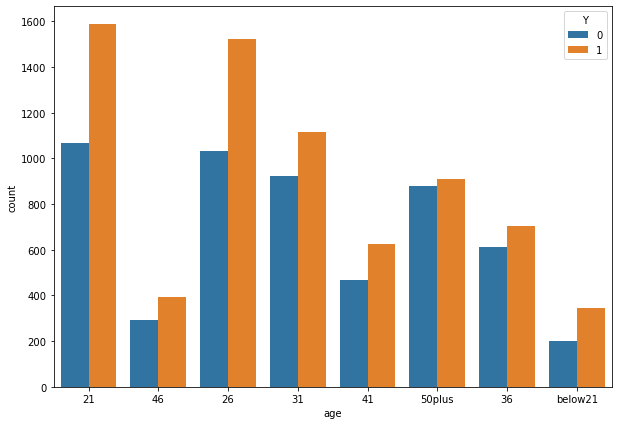

In [141]:
plt.figure(figsize=(10,7)) 
sns.countplot(data = df,x="age",hue = "Y")

### 1.almost, every age group they are accepting coupons.
### 2. for all age groups, no of acceptance is higher than the not aaceptance of coupons.
### 3. below 21 has the lowest no of acceptance. it is quite obvious that they may not be driver or may not have  a proper DL , so, they are the least important target group for this kind of business. 
### 4. Age between 21 to 26 have the max no of acceptance of coupons. They are the major tg of this business according to the survey. 

In [43]:
df["maritalStatus"].value_counts()

Married partner      5100
Single               4752
Unmarried partner    2186
Divorced              516
Widowed               130
Name: maritalStatus, dtype: int64

<AxesSubplot:xlabel='maritalStatus', ylabel='count'>

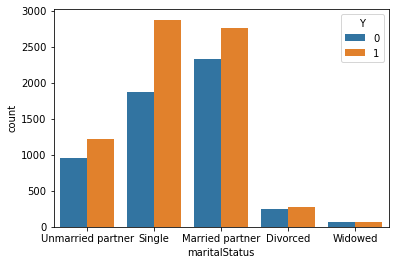

In [44]:
sns.countplot(data = df,x="maritalStatus",hue = "Y")

### For a single person , its almost double chance to accept a coupon rather than not accepting it. 

In [45]:
df["has_children"].value_counts()

0    7431
1    5253
Name: has_children, dtype: int64

<AxesSubplot:xlabel='has_children', ylabel='count'>

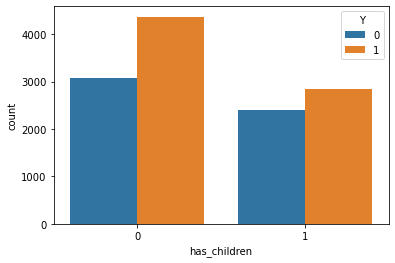

In [46]:
sns.countplot(data = df,x="has_children",hue = "Y")

### people who dont have childen are more likely to accept a coupon.

In [47]:
df["education"].value_counts()

Some college - no degree                  4351
Bachelors degree                          4335
Graduate degree (Masters or Doctorate)    1852
Associates degree                         1153
High School Graduate                       905
Some High School                            88
Name: education, dtype: int64

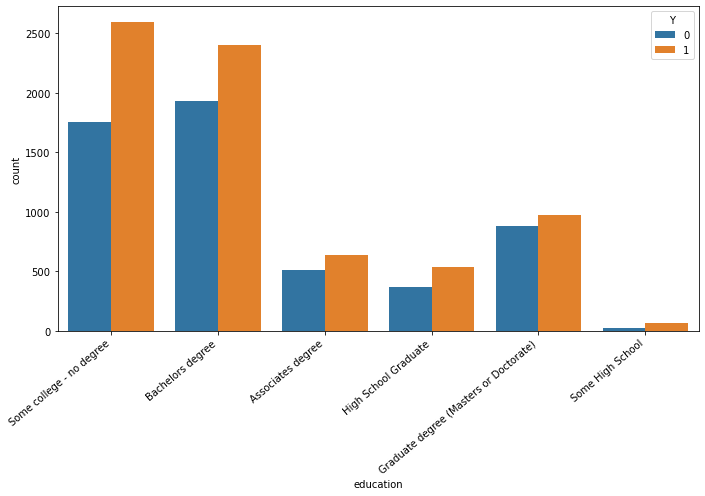

In [146]:
plt.figure(figsize=(10,7)) 
ax1=sns.countplot(data = df,x="education",hue = "Y")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### college students with no degree and bachelors degrees both are more likely to accept the coupons

In [49]:
df["occupation"].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


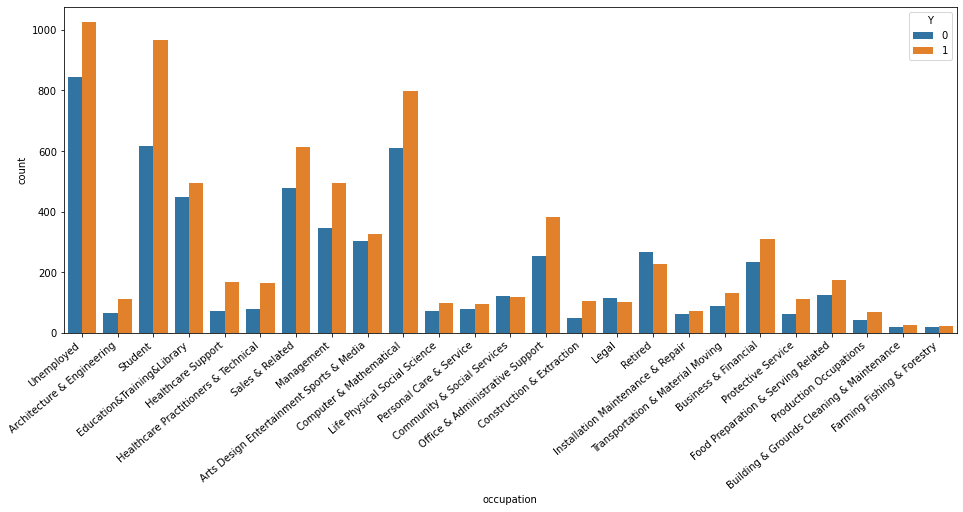

In [144]:
plt.figure(figsize=(16,6))
ax2=sns.countplot(data = df,x="occupation",hue = "Y")
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
plt.show()

### people who are student by profession are more liekly to accept a coupon (almost 1.5 times)

In [51]:
df["income"].value_counts()

$25000 - $37499     2013
$12500 - $24999     1831
$37500 - $49999     1805
$100000 or More     1736
$50000 - $62499     1659
Less than $12500    1042
$87500 - $99999      895
$75000 - $87499      857
$62500 - $74999      846
Name: income, dtype: int64

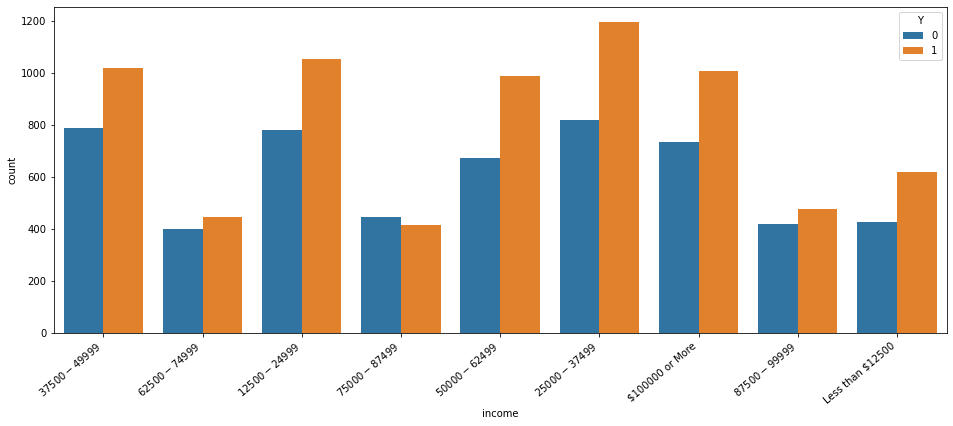

In [52]:
plt.figure(figsize=(16,6))
ax3=sns.countplot(data = df,x="income",hue = "Y")
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [53]:
df["Bar"].value_counts()

never             5197
Atmost 1          3482
1 to 3            2473
4 to 8            1076
Greater than 8     349
Name: Bar, dtype: int64

<AxesSubplot:xlabel='Bar', ylabel='count'>

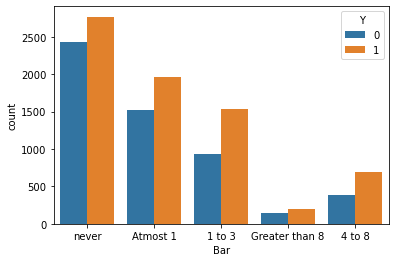

In [54]:
sns.countplot(data = df,x="Bar",hue = "Y")

In [55]:
df["CoffeeHouse"].value_counts()

Atmost 1          3385
1 to 3            3225
never             2962
4 to 8            1784
Greater than 8    1111
Name: CoffeeHouse, dtype: int64

<AxesSubplot:xlabel='CoffeeHouse', ylabel='count'>

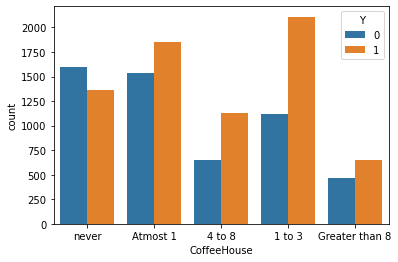

In [56]:
sns.countplot(data = df,x="CoffeeHouse",hue = "Y")

### People who goes 1 to 3 times a month , they are almost more than 2 times more likely to accept a coupon. 

In [57]:
df["RestaurantLessThan20"].value_counts()

1 to 3            5376
4 to 8            3580
Atmost 1          2093
Greater than 8    1285
never              220
Name: RestaurantLessThan20, dtype: int64

<AxesSubplot:xlabel='RestaurantLessThan20', ylabel='count'>

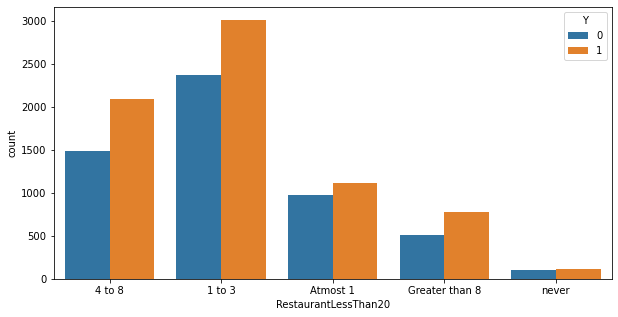

In [147]:
plt.figure(figsize=(10,5)) 
sns.countplot(data = df,x="RestaurantLessThan20",hue = "Y")

In [149]:

df["Restaurant20To50"].value_counts()

Atmost 1          6077
1 to 3            3290
never             2136
4 to 8             728
Greater than 8     264
Name: Restaurant20To50, dtype: int64

<AxesSubplot:xlabel='Restaurant20To50', ylabel='count'>

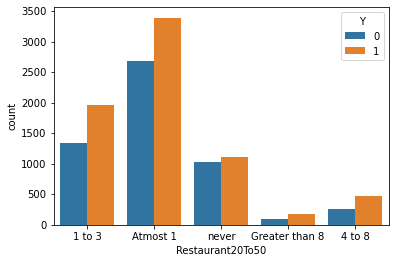

In [60]:
sns.countplot(data = df,x="Restaurant20To50",hue = "Y")

<AxesSubplot:xlabel='toCoupon_GEQ5min', ylabel='count'>

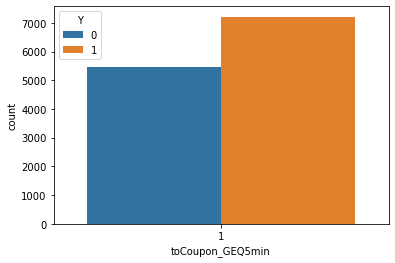

In [62]:
sns.countplot(data = df,x="toCoupon_GEQ5min",hue = "Y")

In [63]:
df.head(30)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,Low,Evening,Restaurant(<20),24h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,High,Morning,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,High,Morning,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,24h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,High,Evening,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,Low,Evening,Carry out & Take away,24h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,High,Morning,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,High,Morning,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,High,Morning,Bar,24h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,0,1,0


In [64]:
df["toCoupon_GEQ15min"].value_counts()

1    7122
0    5562
Name: toCoupon_GEQ15min, dtype: int64

In [65]:
df["toCoupon_GEQ15min"]

0        0
1        0
2        1
3        1
4        1
        ..
12679    0
12680    0
12681    0
12682    1
12683    0
Name: toCoupon_GEQ15min, Length: 12684, dtype: int64

<AxesSubplot:xlabel='toCoupon_GEQ15min', ylabel='count'>

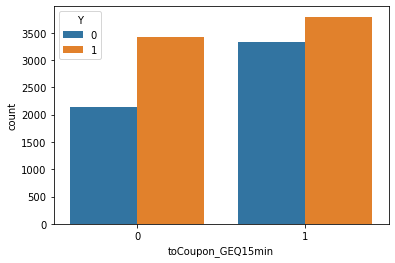

In [66]:
sns.countplot(data = df,x="toCoupon_GEQ15min",hue = "Y")

<AxesSubplot:xlabel='toCoupon_GEQ15min', ylabel='count'>

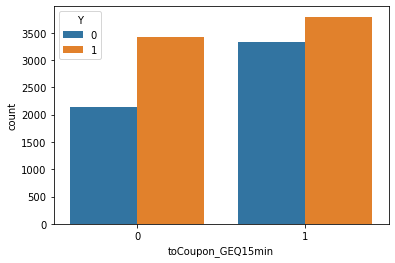

In [67]:
sns.countplot(data = df,x="toCoupon_GEQ15min",hue = "Y")

In [68]:
df["toCoupon_GEQ25min"].value_counts()

0    11173
1     1511
Name: toCoupon_GEQ25min, dtype: int64

In [69]:
df["toCoupon_GEQ25min"]

0        0
1        0
2        0
3        0
4        0
        ..
12679    0
12680    0
12681    0
12682    1
12683    0
Name: toCoupon_GEQ25min, Length: 12684, dtype: int64

<AxesSubplot:xlabel='toCoupon_GEQ25min', ylabel='count'>

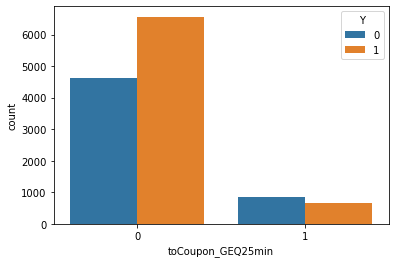

In [70]:
sns.countplot(data = df,x="toCoupon_GEQ25min",hue = "Y")

In [71]:
df["direction_same"].value_counts()

0    9960
1    2724
Name: direction_same, dtype: int64

<AxesSubplot:xlabel='direction_same', ylabel='count'>

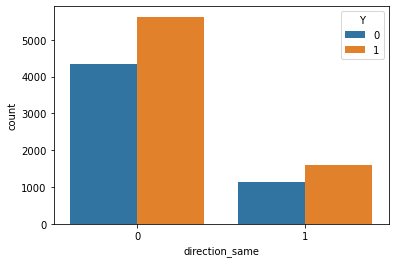

In [72]:
sns.countplot(data = df,x="direction_same",hue = "Y")

In [73]:
df["direction_opp"].value_counts()

1    9960
0    2724
Name: direction_opp, dtype: int64

In [74]:
x=df["direction_opp"].value_counts()
x.index

Int64Index([1, 0], dtype='int64')

<AxesSubplot:xlabel='direction_opp', ylabel='count'>

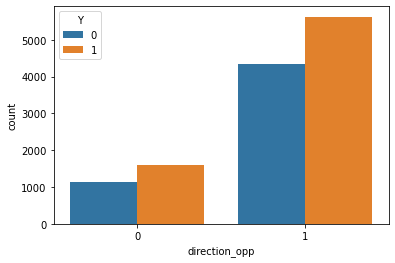

In [75]:
sns.countplot(data = df,x="direction_opp",hue = "Y")

## Ordinal Columns

<AxesSubplot:>

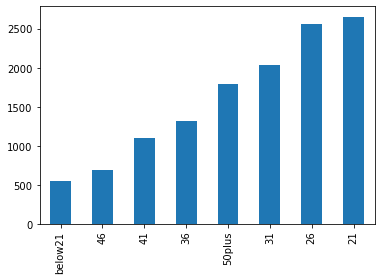

In [76]:
df["age"].value_counts().sort_values().plot(kind="bar")

# frequency distribution of ordinal columns

In [77]:
ordinal_col = ['temperature','expiration','age','income']

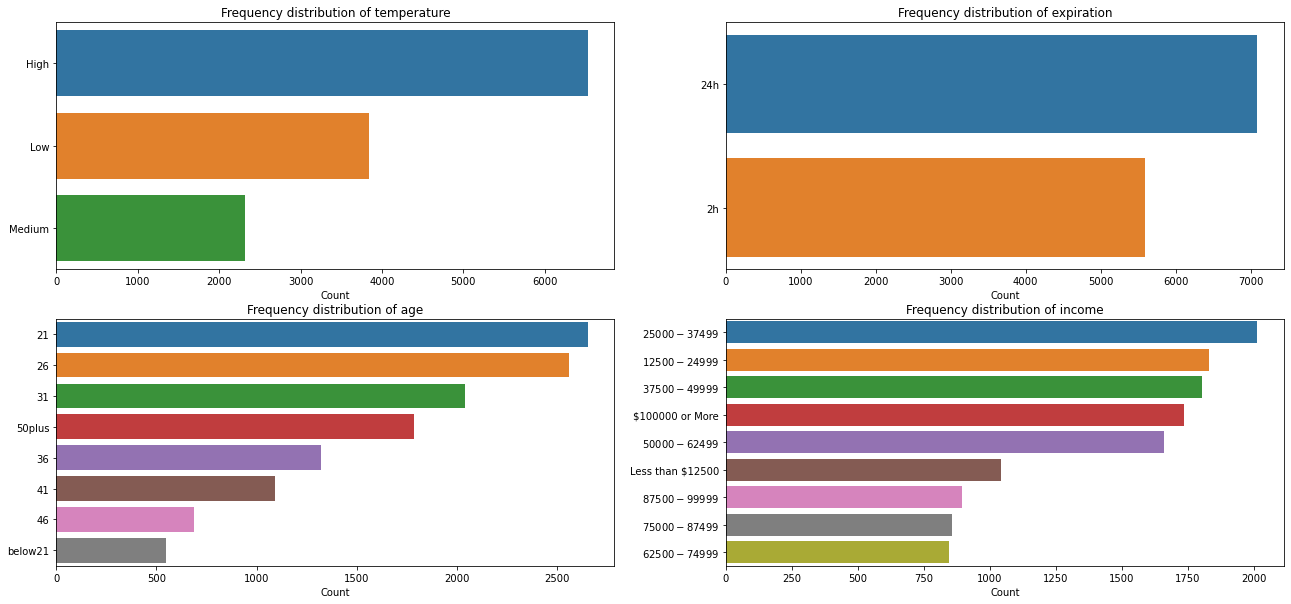

In [163]:
def freq_plot(nrows,ncols,figsize,cols_to_plot):
    fig,ax = plt.subplots(nrows=nrows,ncols=ncols,figsize = figsize) #for multiple subplots
    ax= ax.flatten()
    i=0
    for col in df.columns:
        if col in cols_to_plot and col != "Y":
            if df[col].dtype == np.int64:
                df[col] = df[col].astype(str) #any numeric col is first converted to make countplots
            temporary = df[col].value_counts()
            sns.barplot(x=temporary.values,y=temporary.index,ax = ax[i])
            ax[i].set_xlabel("Count")
            ax[i].set_title(f"Frequency distribution of {col}")
            i = i+1
freq_plot(nrows=2,ncols=2,figsize=(22,10),cols_to_plot=ordinal_col)    

### 1.Temperature value is mostly high in our data. Probably most of the survey respondents lived in hot areas. 
### 2.Coupons with expiration time of 24h and 2h is almost same in number which is good for not introducing any coupon-type related bias in data.
### 3.Most of the survey respondents are in 21-31 age group and least from below-21 probably because adults are mostly outgoing (late 20's) and younger people / teens aren't allowed to drive cars since this data is from coupon recommendation system inside cars and respondent is the driver himself.
### 4.Most people belong to lower salary ranges.


# frequency distribution of nominal columns

In [166]:
set(df.columns)

{'Bar',
 'CarryAway',
 'CoffeeHouse',
 'Restaurant20To50',
 'RestaurantLessThan20',
 'Y',
 'age',
 'car',
 'coupon',
 'destination',
 'direction_opp',
 'direction_same',
 'education',
 'expiration',
 'gender',
 'has_children',
 'income',
 'maritalStatus',
 'occupation',
 'passanger',
 'temperature',
 'time',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'toCoupon_GEQ5min',
 'weather'}

In [167]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [165]:
nominal_col

{'Bar',
 'CarryAway',
 'CoffeeHouse',
 'Restaurant20To50',
 'RestaurantLessThan20',
 'Y',
 'car',
 'coupon',
 'destination',
 'direction_opp',
 'direction_same',
 'education',
 'gender',
 'has_children',
 'maritalStatus',
 'occupation',
 'passanger',
 'time',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'toCoupon_GEQ5min',
 'weather'}

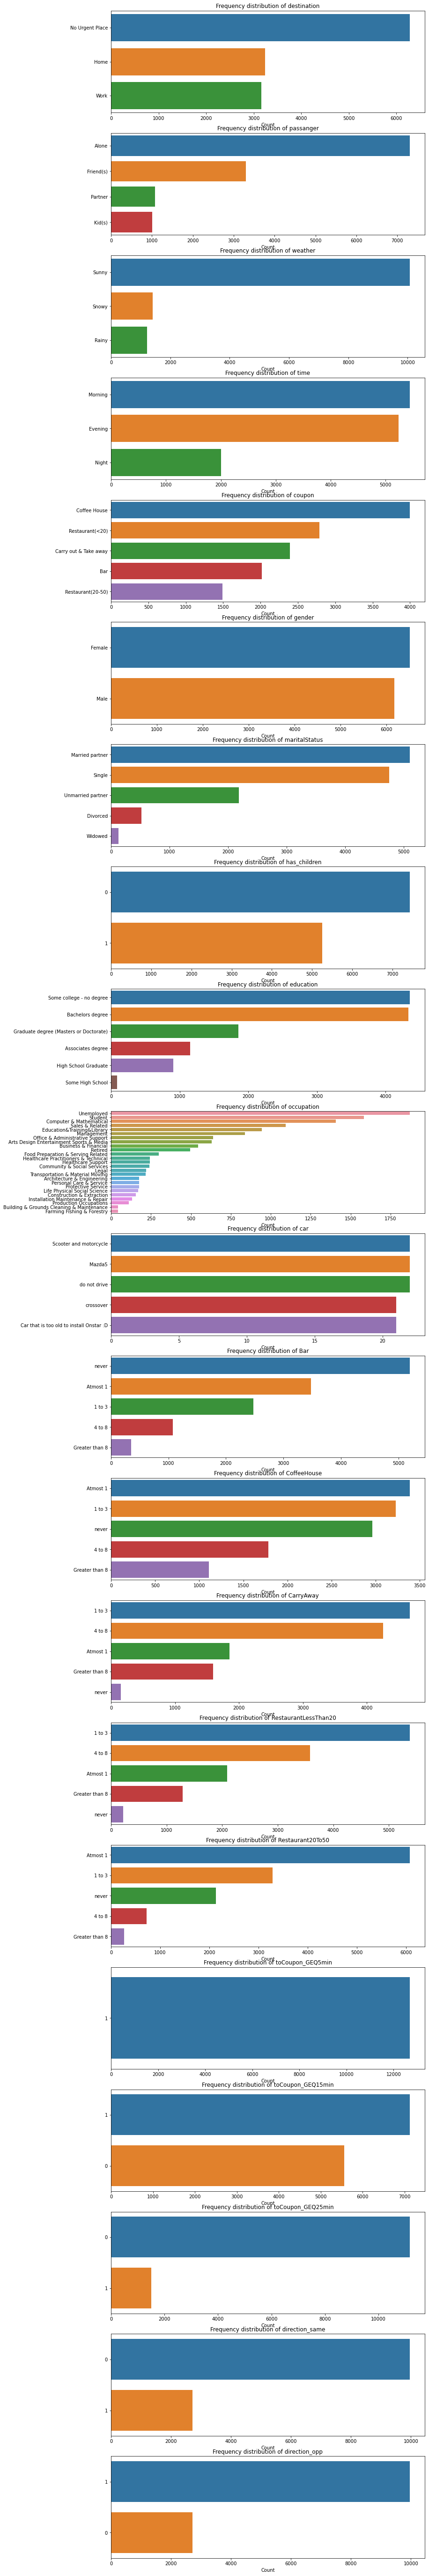

In [164]:
nominal_col = set(df.columns)- set(ordinal_col)         # to avoid ValueError: operands could not be 
                                                        #broadcast together with shapes (26,) (4,)
nrows = len(nominal_col) - 1 #excluding target "Y"
ncols = 1
figsize = (12,100)

freq_plot(nrows,ncols,figsize,nominal_col)

### 1. In High temp area, zone or time, 2. at morning and evening , 3. people who are driving alone, 4.Married Partner and alone people 5. Unemployed peolple and Students 6. Some clg and Bachelor Degree holders,  have the max no of distribution.

### Max coupons are offered for the Coffee_houses , followed by the cheap restaurants.

### In a month people are more likely to order and pack their foods rather than going to bar and coffehouse as per the freq distribution shown by the data.

### toCoupon_GEQ5min has only one distribution that is 1. so, using some conditional statements it can be clubbed with other twos like toCoupon_GEQ15 and 25.

### Direction_same and Direction_opp are having almsot same distribution of just oppostite value_counts. So one is correlated with others.

# RestaurantLessThan20 Vs Restaurant20to50

In [168]:
print(df["RestaurantLessThan20"].value_counts())

print(df["Restaurant20To50"].value_counts())

1 to 3            5376
4 to 8            3580
Atmost 1          2093
Greater than 8    1285
never              220
Name: RestaurantLessThan20, dtype: int64
Atmost 1          6077
1 to 3            3290
never             2136
4 to 8             728
Greater than 8     264
Name: Restaurant20To50, dtype: int64


In [81]:
cheap = df['RestaurantLessThan20'].value_counts()
exp = df['Restaurant20To50'].value_counts()
combine = pd.merge(cheap,exp,left_index=True,right_index=True).reset_index()
combine

,index,RestaurantLessThan20,Restaurant20To50
0,1 to 3,5376,3290
1,4 to 8,3580,728
2,Atmost 1,2093,6077
3,Greater than 8,1285,264
4,never,220,2136


In [82]:
final = pd.melt(combine,id_vars=['index'], value_vars=['RestaurantLessThan20','Restaurant20To50'])  # unpivoting for plotting
final

,index,variable,value
0,1 to 3,RestaurantLessThan20,5376
1,4 to 8,RestaurantLessThan20,3580
2,Atmost 1,RestaurantLessThan20,2093
3,Greater than 8,RestaurantLessThan20,1285
4,never,RestaurantLessThan20,220
5,1 to 3,Restaurant20To50,3290
6,4 to 8,Restaurant20To50,728
7,Atmost 1,Restaurant20To50,6077
8,Greater than 8,Restaurant20To50,264
9,never,Restaurant20To50,2136


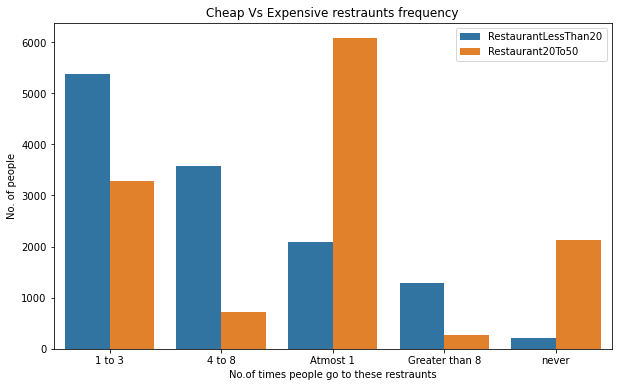

In [83]:
plt.figure(figsize=(10,6))
sns.barplot(data=final,x='index',y='value',hue='variable')
plt.xlabel("No.of times people go to these restraunts")
plt.ylabel("No. of people")
plt.title("Cheap Vs Expensive restraunts frequency")
plt.legend()
plt.show()

###  it is clearly evident that people rarely (Atmost 1 time) go to expensive restraunts and people mostly (1 to 3 & 4 to 8 times) prefer cheaper restraunts.

# Income vs Restaurant20to50

In [185]:
temporary1 = pd.DataFrame(df.groupby(["income","Restaurant20To50"]).size()).reset_index()
temporary1.head()

,income,Restaurant20To50,0
0,$100000 or More,1 to 3,655
1,$100000 or More,4 to 8,167
2,$100000 or More,Atmost 1,782
3,$100000 or More,never,110
4,$12500 - $24999,1 to 3,254


In [85]:
temporary1.columns = ["income","Restaurant20To50","values"]

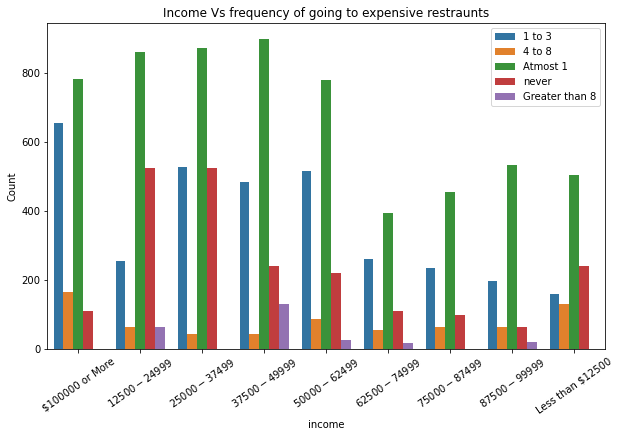

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(data=temporary1,x='income',y='values',hue='Restaurant20To50')
plt.xticks(rotation = 35)
plt.ylabel("Count")
plt.title("Income Vs frequency of going to expensive restraunts")
plt.legend()
plt.show()

###  irrespective of their incomes most people go to expensive restaurants 'Atmost 1' times. However, people earning $100k or more are more likely to visit 1-3 times as compared to others.

# Income vs RestaurantLessThan20

In [171]:
pd.DataFrame(df.groupby(["income","RestaurantLessThan20"]).size()).reset_index()

,income,RestaurantLessThan20,0
0,$100000 or More,1 to 3,692
1,$100000 or More,4 to 8,650
2,$100000 or More,Atmost 1,110
3,$100000 or More,Greater than 8,262
4,$100000 or More,never,22
5,$12500 - $24999,1 to 3,845
6,$12500 - $24999,4 to 8,446
7,$12500 - $24999,Atmost 1,374
8,$12500 - $24999,Greater than 8,166
9,$25000 - $37499,1 to 3,863


In [87]:
temporary2 = pd.DataFrame(df.groupby(["income","RestaurantLessThan20"]).size()).reset_index()

In [88]:
temporary2.columns = ["income","RestaurantLessThan20","values"]

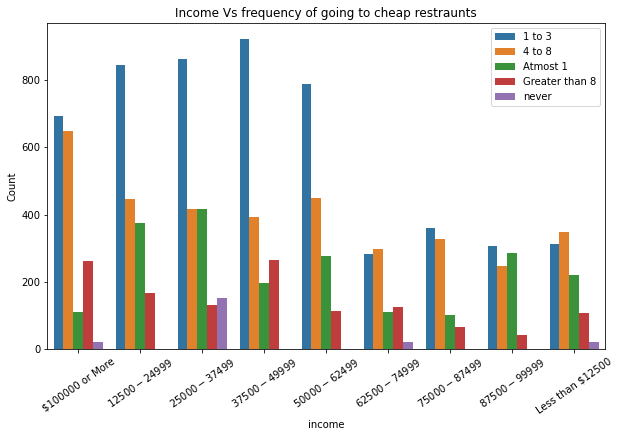

In [89]:
plt.figure(figsize=(10,6))
sns.barplot(data=temporary2,x='income',y='values',hue='RestaurantLessThan20')
plt.xticks(rotation = 35)
plt.ylabel("Count")
plt.title("Income Vs frequency of going to cheap restraunts")
plt.legend()
plt.show()

### no of frequency for going to cheap restaurant(1 to 3) is much higher for income bucket 12k to 60k.

# Comparing Bar, Coffeehouse and carryaway

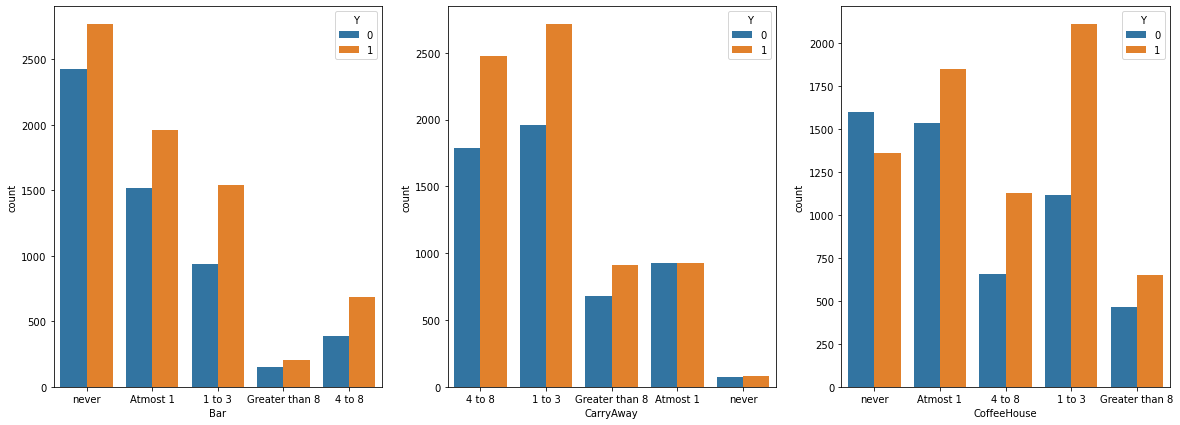

In [173]:
plt.rcParams["figure.figsize"] = [20 ,7]
fig, ax =plt.subplots(1,3)
sns.countplot(data=df,x='Bar',hue="Y",ax=ax[0])
sns.countplot(data=df,x='CarryAway',hue="Y", ax=ax[1])
sns.countplot(data=df,x='CoffeeHouse', hue="Y",ax=ax[2])

plt.show()

# Data Preprocessing

In [174]:
df2 = df.copy()

# Dropping direction_same column

In [175]:
# let's drop direction_same as it's perfectly correlated with direction_opp
df.drop('direction_same',axis=1,inplace=True)

In [176]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_opp,Y
0,No Urgent Place,Alone,Sunny,Low,Evening,Restaurant(<20),24h,Female,21,Unmarried partner,...,never,never,NaN,4 to 8,1 to 3,1,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,High,Morning,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4 to 8,1 to 3,1,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,High,Morning,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,never,NaN,4 to 8,1 to 3,1,1,0,1,1
3,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,2h,Female,21,Unmarried partner,...,never,never,NaN,4 to 8,1 to 3,1,1,0,1,0
4,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,24h,Female,21,Unmarried partner,...,never,never,NaN,4 to 8,1 to 3,1,1,0,1,0


## Combining 'toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min' into a single column driving_distance

In [178]:
def custom_where(time):
    '''
    Helper function to combine 3 redundant columns into 1 using simple if-else
    '''

    x,y,z = list(map(str,time))
    if x == '1':
        if y=='1':
            if z=='1':
                return 'within 25mins'
            else:
                return 'within 15mins'
        else:
            return 'within 5mins'

In [179]:
df['driving_distance'] = df[['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min']].apply(custom_where,axis=1,raw=True)

### raw = True

rawbool, default False
Determines if row or column is passed as a Series or ndarray object:

False : passes each row or column as a Series to the function.

True : the passed function will receive ndarray objects instead. If you are just applying a NumPy reduction function this will achieve much better performance.

In [180]:
df.head(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_opp,Y,driving_distance
0,No Urgent Place,Alone,Sunny,Low,Evening,Restaurant(<20),24h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,0,0,1,1,within 5mins
1,No Urgent Place,Friend(s),Sunny,High,Morning,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,0,0,1,0,within 5mins
2,No Urgent Place,Friend(s),Sunny,High,Morning,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,1,1,within 15mins
3,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,1,0,within 15mins
4,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,24h,Female,21,Unmarried partner,...,never,NaN,4 to 8,1 to 3,1,1,0,1,0,within 15mins


In [97]:
#a,b,c = list(map(str,(1,2,3)))

In [98]:
#a

In [99]:
#list(map(str,[1,2,3]))

In [100]:
#p,q,r = list(map(str,[1,2,3]))

In [101]:
#p

In [102]:
#list(map(str,(1,2,3)))

In [181]:
df.drop(['toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'],axis=1,inplace=True)

In [182]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_opp,Y,driving_distance
0,No Urgent Place,Alone,Sunny,Low,Evening,Restaurant(<20),24h,Female,21,Unmarried partner,...,$37500 - $49999,NaN,never,never,NaN,4 to 8,1 to 3,1,1,within 5mins
1,No Urgent Place,Friend(s),Sunny,High,Morning,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,NaN,never,never,NaN,4 to 8,1 to 3,1,0,within 5mins
2,No Urgent Place,Friend(s),Sunny,High,Morning,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,NaN,never,never,NaN,4 to 8,1 to 3,1,1,within 15mins
3,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,NaN,never,never,NaN,4 to 8,1 to 3,1,0,within 15mins
4,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,24h,Female,21,Unmarried partner,...,$37500 - $49999,NaN,never,never,NaN,4 to 8,1 to 3,1,0,within 15mins


# driving-distance on Acceptance of coupons

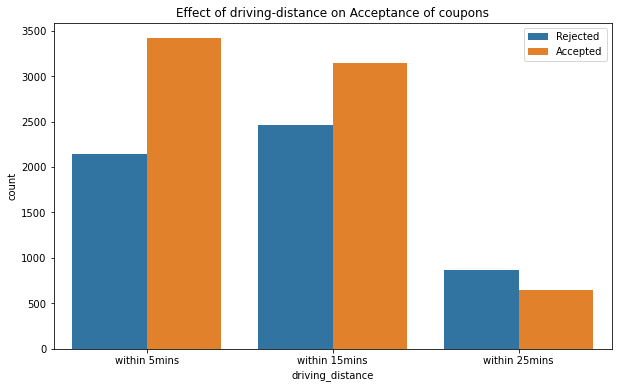

In [183]:
plt.figure(figsize=(10,6))
sns.countplot(x='driving_distance',data=df,hue='Y')
plt.title("Effect of driving-distance on Acceptance of coupons")
plt.legend(labels=['Rejected','Accepted'])
plt.show()

### Missing Value Imputation

In [106]:
df.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
direction_opp               0
Y                           0
driving_distance            0
dtype: int64

In [107]:
def missing_value_impute(columns_ind,df):
    for col_ind in columns_ind:
        most_freq = df.iloc[:,col_ind].mode()[0]
        df.iloc[:,col_ind].fillna(most_freq,inplace=True)
    return df

In [108]:
df["car"].fillna("Missing",inplace=True)
null_col_ind = np.nonzero(df.isnull().sum().values)[0]  ## get all columns indices with NAN's
missing_value_impute(null_col_ind,df)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,direction_opp,Y,driving_distance
0,No Urgent Place,Alone,Sunny,Low,Evening,Restaurant(<20),24h,Female,21,Unmarried partner,...,$37500 - $49999,Missing,never,never,1 to 3,4 to 8,1 to 3,1,1,within 5mins
1,No Urgent Place,Friend(s),Sunny,High,Morning,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,Missing,never,never,1 to 3,4 to 8,1 to 3,1,0,within 5mins
2,No Urgent Place,Friend(s),Sunny,High,Morning,Carry out & Take away,2h,Female,21,Unmarried partner,...,$37500 - $49999,Missing,never,never,1 to 3,4 to 8,1 to 3,1,1,within 15mins
3,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,2h,Female,21,Unmarried partner,...,$37500 - $49999,Missing,never,never,1 to 3,4 to 8,1 to 3,1,0,within 15mins
4,No Urgent Place,Friend(s),Sunny,High,Evening,Coffee House,24h,Female,21,Unmarried partner,...,$37500 - $49999,Missing,never,never,1 to 3,4 to 8,1 to 3,1,0,within 15mins
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12679,Home,Partner,Rainy,Low,Evening,Carry out & Take away,24h,Male,26,Single,...,$75000 - $87499,Missing,never,never,1 to 3,4 to 8,1 to 3,0,1,within 5mins
12680,Work,Alone,Rainy,Low,Morning,Carry out & Take away,24h,Male,26,Single,...,$75000 - $87499,Missing,never,never,1 to 3,4 to 8,1 to 3,1,1,within 5mins
12681,Work,Alone,Snowy,Medium,Morning,Coffee House,24h,Male,26,Single,...,$75000 - $87499,Missing,never,never,1 to 3,4 to 8,1 to 3,0,0,within 5mins
12682,Work,Alone,Snowy,Medium,Morning,Bar,24h,Male,26,Single,...,$75000 - $87499,Missing,never,never,1 to 3,4 to 8,1 to 3,1,0,within 25mins


In [109]:
#np.nonzero(df.isnull().sum().values)[0]

In [110]:
#df.isnull().sum().values

In [111]:
#np.nonzero(df.isnull().sum().values)[0] #not car column since its filled up by missing before applying this function

In [112]:
#df.isnull().sum()

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  object
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  object
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   12684 non-null  object
 15  Bar                   12684 non-null

In [114]:
df.to_csv("Preprocessed Data.csv",index=False)